
[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


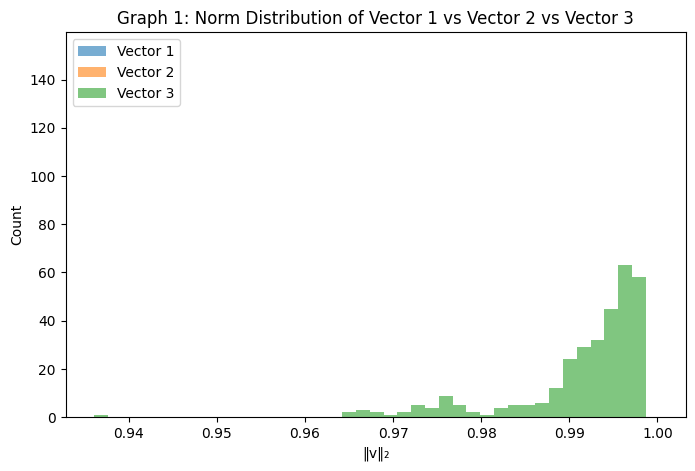

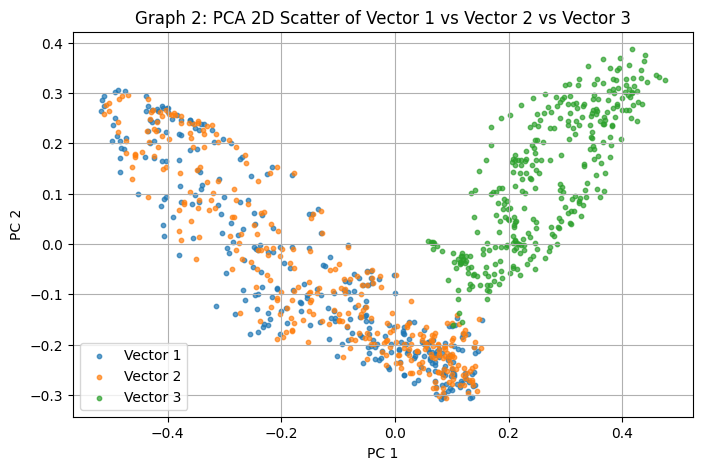

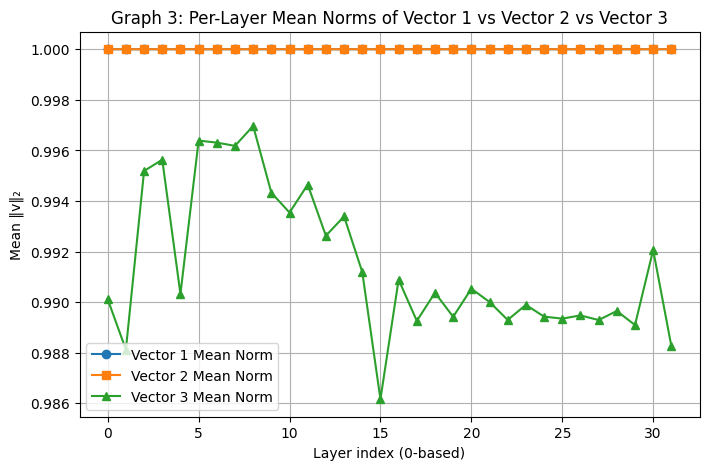

In [10]:
!pip -q install scikit-learn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ─── 0. LOAD PICKLE FILES ───────────────────────────────────────────────────────────
with open('created_vector/steering_vector_final.pkl', 'rb') as f:
    new_vector = pickle.load(f)   # dict[layer → [Tensor × K offsets]]

with open('test_vectors/selfpreference_from_hackathon_submission_unnorm.pkl', 'rb') as f:
    hackathon_submission_unnorm = pickle.load(f)   # dict[layer → [Tensor × K offsets]]

with open('test_vectors/selfpreference_from_christopher_ackerman.pkl', 'rb') as f:
    self_rec_christ_llama_3 = pickle.load(f)   # dict[layer → [Tensor × K offsets]]

# ─── CONVERT TO NUMPY ARRAYS ───────────────────────────────────────────────────────
vector1_list = [v.numpy() for vs in new_vector.values() for v in vs]
vector2_list = [v.numpy() for vs in hackathon_submission_unnorm.values() for v in vs]
vector3_list = [v.numpy() for vs in self_rec_christ_llama_3.values() for v in vs]

vector1_mat = np.vstack(vector1_list)  # (total_offsets, hidden_size)
vector2_mat = np.vstack(vector2_list)
vector3_mat = np.vstack(vector3_list)

# ─── GRAPH 1: NORM HISTOGRAM FOR VECTOR 1, VECTOR 2, VECTOR 3 ─────────────────────
norms_v1 = np.linalg.norm(vector1_mat, axis=1)
norms_v2 = np.linalg.norm(vector2_mat, axis=1)
norms_v3 = np.linalg.norm(vector3_mat, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(norms_v1, bins=40, alpha=0.6, label="Vector 1")
plt.hist(norms_v2, bins=40, alpha=0.6, label="Vector 2")
plt.hist(norms_v3, bins=40, alpha=0.6, label="Vector 3")
plt.title("Graph 1: Norm Distribution of Vector 1 vs Vector 2 vs Vector 3")
plt.xlabel("‖v‖₂")
plt.ylabel("Count")
plt.legend()
plt.show()

# ─── GRAPH 2: PCA 2D SCATTER FOR VECTOR 1, VECTOR 2, VECTOR 3 ─────────────────────
all_mat = np.vstack([vector1_mat, vector2_mat, vector3_mat])
pca = PCA(n_components=2)
coords = pca.fit_transform(all_mat)

n1 = vector1_mat.shape[0]
n2 = vector2_mat.shape[0]
n3 = vector3_mat.shape[0]

coords_v1 = coords[:n1]
coords_v2 = coords[n1:n1+n2]
coords_v3 = coords[n1+n2:n1+n2+n3]

plt.figure(figsize=(8, 5))
plt.scatter(coords_v1[:, 0], coords_v1[:, 1], s=10, label="Vector 1", alpha=0.7)
plt.scatter(coords_v2[:, 0], coords_v2[:, 1], s=10, label="Vector 2", alpha=0.7)
plt.scatter(coords_v3[:, 0], coords_v3[:, 1], s=10, label="Vector 3", alpha=0.7)
plt.title("Graph 2: PCA 2D Scatter of Vector 1 vs Vector 2 vs Vector 3")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

# ─── GRAPH 3: PER-LAYER MEAN NORM COMPARISON FOR VECTOR 1, VECTOR 2, VECTOR 3 ───────
num_layers = len(new_vector)            # e.g. 32
K = len(next(iter(new_vector.values())))  # e.g. 10

mean_norms_v1 = np.zeros(num_layers)
for i, layer in enumerate(sorted(new_vector.keys())):
    norms = [np.linalg.norm(v.numpy()) for v in new_vector[layer]]
    mean_norms_v1[i] = np.mean(norms)

mean_norms_v2 = np.zeros(num_layers)
for i, layer in enumerate(sorted(hackathon_submission_unnorm.keys())):
    norms = [np.linalg.norm(v.numpy()) for v in hackathon_submission_unnorm[layer]]
    mean_norms_v2[i] = np.mean(norms)

mean_norms_v3 = np.zeros(num_layers)
for i, layer in enumerate(sorted(self_rec_christ_llama_3.keys())):
    norms = [np.linalg.norm(v.numpy()) for v in self_rec_christ_llama_3[layer]]
    mean_norms_v3[i] = np.mean(norms)

layers = np.arange(num_layers)
plt.figure(figsize=(8, 5))
plt.plot(layers, mean_norms_v1, marker='o', label="Vector 1 Mean Norm")
plt.plot(layers, mean_norms_v2, marker='s', label="Vector 2 Mean Norm")
plt.plot(layers, mean_norms_v3, marker='^', label="Vector 3 Mean Norm")
plt.title("Graph 3: Per-Layer Mean Norms of Vector 1 vs Vector 2 vs Vector 3")
plt.xlabel("Layer index (0-based)")
plt.ylabel("Mean ‖v‖₂")
plt.legend()
plt.grid(True)
plt.show()
